<a href="https://colab.research.google.com/github/danendradgp/Tubes4_Danendradgp/blob/main/TubesPython4_Danendra_Dhiaulichsan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Pathloss(jarak, frek, tipe_area, ht, hr):
  if frek in range(150,1501):
    c1=69.55
    c2=26.16
  elif frek in range(1501,2001):
    c1=46.3
    c2=33.9

  if tipe_area == 'Urban':
    cm=0
  elif tipe_area == 'Suburban':
    cm= -2*((np.log10((frek/28)**2))-5.4)
  elif tipe_area == 'Open':
    cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
  else :
    cm='Wrong Tipe'

  ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
  Lp = c1 + (c2*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(jarak))-cm

  return Lp

In [3]:
def dayaterima(Ptx, PL, Gain_pemancar, Gain_penerima):
  Ptx=10*np.log10(Ptx)
  Prx=Ptx - PL + Gain_pemancar + Gain_penerima
  Prx=10**(Prx/10)

  return Prx

In [4]:
f=1800
Gain_tx = 10
Gain_rx = 2
tipe1='Urban'
tipe2='Suburban'
tipe3= 'Open'
tower = 80
user = 1.5
jmin = 300
jmax = 1000
x = 200
j = np.random.randint(jmin,jmax,x)

In [5]:
graphUrban=dayaterima(30000,Pathloss(j,f,tipe1,tower,user),Gain_tx,Gain_rx)
graphSuburban=dayaterima(30000,Pathloss(j,f,tipe2,tower,user),Gain_tx,Gain_rx)
graphOpen=dayaterima(30000,Pathloss(j,f,tipe3,tower,user),Gain_tx,Gain_rx)

In [6]:
j_sort=j[np.argsort(j)]
Urban_sort=graphUrban[np.argsort(j)]
Suburban_sort=graphSuburban[np.argsort(j)]
Open_sort=graphOpen[np.argsort(j)]

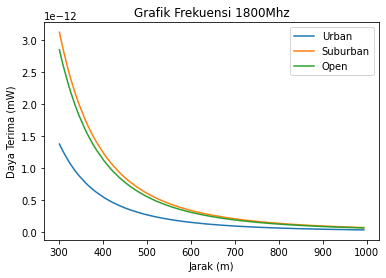

In [7]:
plt.figure()
plt.plot(j_sort,Urban_sort,label="Urban")
plt.plot(j_sort,Suburban_sort,label="Suburban")
plt.plot(j_sort,Open_sort,label="Open")
plt.legend()
plt.title("Grafik Frekuensi 1800Mhz")
plt.xlabel("Jarak (m)")
plt.ylabel("Daya Terima (mW)")
plt.show()

In [8]:
f1=700
f2=900
f3=1800
Gain_tx = 10
Gain_rx = 2
tipe='Urban'
tower = 80
user = 1.5
jmin = 200
jmax = 700
y = 200
j = np.random.randint(jmin,jmax,y)

In [10]:
urbanFrek1=dayaterima(30000,Pathloss(j,f1,tipe,tower,user),Gain_tx,Gain_rx)
urbanFrek2=dayaterima(30000,Pathloss(j,f2,tipe,tower,user),Gain_tx,Gain_rx)
urbanFrek3=dayaterima(30000,Pathloss(j,f3,tipe,tower,user),Gain_tx,Gain_rx)

In [11]:
j_sort=j[np.argsort(j)]
frek1_sort=urbanFrek1[np.argsort(j)]
frek2_sort=urbanFrek2[np.argsort(j)]
frek3_sort=urbanFrek3[np.argsort(j)]

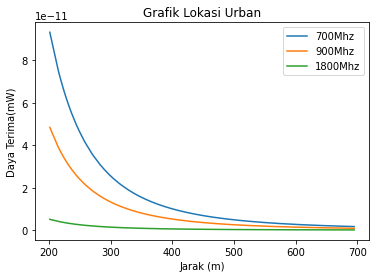

In [12]:
plt.figure()
plt.plot(j_sort,frek1_sort,label="700Mhz")
plt.plot(j_sort,frek2_sort,label="900Mhz")
plt.plot(j_sort,frek3_sort,label="1800Mhz")
plt.legend()
plt.title("Grafik Lokasi Urban")
plt.xlabel("Jarak (m)")
plt.ylabel("Daya Terima(mW)")
plt.show()

In [13]:
def SNR(dt,Bw):
  ns= -174 + 10*np.log10(Bw)
  ns= 10**(ns/10)
  snr= dt/ns

  return snr

In [31]:
f=1800
Gain_tx = 10
Gain_rx = 2
tipe1='Urban'
tipe2='Suburban'
tipe3= 'Open'
tower = 80
user = 1.5
jmin = 300
jmax = 1000
x = 200
j = np.random.randint(jmin,jmax,x)

In [32]:
graphUrban=SNR(dayaterima(30000,Pathloss(j,f,tipe1,tower,user),Gain_tx,Gain_rx),5000000)
graphSuburban=SNR(dayaterima(30000,Pathloss(j,f,tipe2,tower,user),Gain_tx,Gain_rx),5000000)
graphOpen=SNR(dayaterima(30000,Pathloss(j,f,tipe3,tower,user),Gain_tx,Gain_rx),5000000)

In [33]:
j_sort=j[np.argsort(j)]
Urban_sort=graphUrban[np.argsort(j)]
Suburban_sort=graphSuburban[np.argsort(j)]
Open_sort=graphOpen[np.argsort(j)]

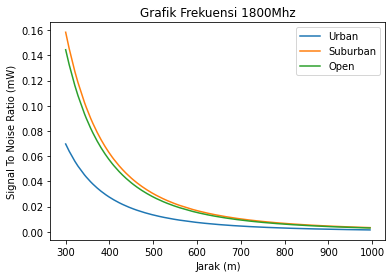

In [34]:
plt.figure()
plt.plot(j_sort,Urban_sort,label="Urban")
plt.plot(j_sort,Suburban_sort,label="Suburban")
plt.plot(j_sort,Open_sort,label="Open")
plt.legend()
plt.title("Grafik Frekuensi 1800Mhz")
plt.xlabel("Jarak (m)")
plt.ylabel("Signal To Noise Ratio (mW)")
plt.show()

In [35]:
f1=700
f2=900
f3=1800
Gain_tx = 10
Gain_rx = 2
tipe='Urban'
tower = 80
user = 1.5
jmin = 300
jmax = 1000
y = 200
j = np.random.randint(jmin,jmax,y)

In [36]:
GraphFrek1=SNR(dayaterima(30000,Pathloss(j,f1,tipe,tower,user),Gain_tx,Gain_rx),5000000)
GraphFrek2=SNR(dayaterima(30000,Pathloss(j,f2,tipe,tower,user),Gain_tx,Gain_rx),5000000)
GraphFrek3=SNR(dayaterima(30000,Pathloss(j,f3,tipe,tower,user),Gain_tx,Gain_rx),5000000)

In [37]:
j_sort=j[np.argsort(j)]
frek1_sort=GraphFrek1[np.argsort(j)]
frek2_sort=GraphFrek2[np.argsort(j)]
frek3_sort=GraphFrek3[np.argsort(j)]

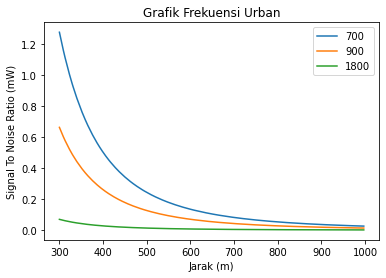

In [38]:
plt.figure()
plt.plot(j_sort,frek1_sort,label="700")
plt.plot(j_sort,frek2_sort,label="900")
plt.plot(j_sort,frek3_sort,label="1800")
plt.legend()
plt.title("Grafik Frekuensi Urban")
plt.xlabel("Jarak (m)")
plt.ylabel("Signal To Noise Ratio (mW)")
plt.show()

In [39]:
def Kc(Sn,Bandwith):
  kapasitas_cellular= Bandwith * np.log2(1+Sn)

  return kapasitas_cellular

In [40]:
f=1800
Gain_tx=10
Gain_rx=2
Bndw=5000000
tipe1='Urban'
tipe2='Suburban'
tipe3= 'Open'
tower = 80
user = 1.5
jmin = 300
jmax = 1000
x = 200
j = np.random.randint(jmin,jmax,x)

In [41]:
graphUrban=Kc(Bndw,SNR(dayaterima(30000,Pathloss(j,f,tipe1,tower,user),Gain_tx,Gain_rx),Bndw))
graphSuburban=Kc(Bndw,SNR(dayaterima(30000,Pathloss(j,f,tipe2,tower,user),Gain_tx,Gain_rx),Bndw))
graphOpen=Kc(Bndw,SNR(dayaterima(30000,Pathloss(j,f,tipe3,tower,user),Gain_tx,Gain_rx),Bndw))

In [42]:
j_sort=j[np.argsort(j)]
Urban_sort=graphUrban[np.argsort(j)]
Suburban_sort=graphSuburban[np.argsort(j)]
Open_sort=graphOpen[np.argsort(j)]

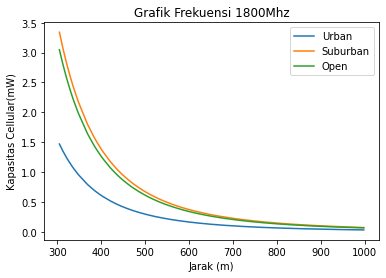

In [43]:
plt.figure()
plt.plot(j_sort,Urban_sort,label="Urban")
plt.plot(j_sort,Suburban_sort,label="Suburban")
plt.plot(j_sort,Open_sort,label="Open")
plt.legend()
plt.title("Grafik Frekuensi 1800Mhz")
plt.xlabel("Jarak (m)")
plt.ylabel("Kapasitas Cellular(mW)")
plt.show()

In [44]:
f1=700
f2=900
f3=1800
Bndw=5000000
Gain_tx = 10
Gain_rx = 2
tipe='Urban'
tower = 80
user = 1.5
jmin = 300
jmax = 1000
y = 200
j = np.random.randint(jmin,jmax,y)

In [45]:
GraphFrek1=Kc(Bndw,SNR(dayaterima(30000,Pathloss(j,f1,tipe1,tower,user),Gain_tx,Gain_rx),Bndw))
GraphFrek2=Kc(Bndw,SNR(dayaterima(30000,Pathloss(j,f2,tipe1,tower,user),Gain_tx,Gain_rx),Bndw))
GraphFrek3=Kc(Bndw,SNR(dayaterima(30000,Pathloss(j,f3,tipe1,tower,user),Gain_tx,Gain_rx),Bndw))

In [46]:
j_sort=j[np.argsort(j)]
frek1_sort=GraphFrek1[np.argsort(j)]
frek2_sort=GraphFrek2[np.argsort(j)]
frek3_sort=GraphFrek3[np.argsort(j)]

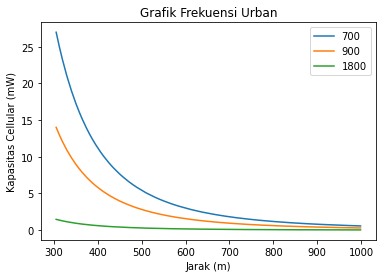

In [47]:
plt.figure()
plt.plot(j_sort,frek1_sort,label="700")
plt.plot(j_sort,frek2_sort,label="900")
plt.plot(j_sort,frek3_sort,label="1800")
plt.legend()
plt.title("Grafik Frekuensi Urban")
plt.xlabel("Jarak (m)")
plt.ylabel("Kapasitas Cellular (mW)")
plt.show()